In [2]:
# load pandas (always do this first)
import pandas as pd
import numpy as np
import math

In [3]:
illegal_dumping = pd.read_csv("illegaldumpsites.csv", 
                                       index_col="site_name") # use the column named _id as the row index
illegal_dumping.iloc[0:5]

,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
site_name,,,,,,,,
St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


This code will remove all of the irrelevant columns from the dataframe. Additionally, it will take all of the blank values in the estimated tons column (inputed as NaN by pandas) and set them to .2 tons. A blank spot likely indicates that the amount of garbage was smaller. That is why .2 tons was selected (it is a lower estimate). 

In [4]:
dumping_rate = illegal_dumping.drop(["City", "location_description", "latitude", "longitude", "Unnamed: 8", "Status"], axis = 1)
dumping_rate.fillna(.2)
dumping_rate = dumping_rate.set_index('Neighborhood')
dumping_rate.iloc[0:5]

,estimated_tons
Neighborhood,
Allentown,0.5
Allentown,3
Allentown,1
Allentown,0.5
Allentown,0.1


This will find the average amount of garbage per dump. It is important to note that there is one major outlier (a value of 999 tons) which was included in the first average, but not the second.

In [5]:
#get data from estimated_tons and convert all empty cells and strings to 0
#examples of strings are "undetermined" and "unapplicable"
sum = 0
for index, row in illegal_dumping.iterrows():
    try:
        k = float(row[3])           
        if(math.isnan(k)):
            row[3] = 0
        else:
            sum += k
    except:
        row[3] = 0
average = sum/len(illegal_dumping.index)
print("average amount of tons per dump is " + str(average))
average_no_outlier = (sum-999)/(len(illegal_dumping.index)-1)
print("average amount of tons per dump without the outlier is " + str(average_no_outlier))

average amount of tons per dump is 2.902262443438915
average amount of tons per dump without the outlier is 1.7741789354473396


This code creates a dictionary which adds up all of the dumping for each neighborhood. At the end the dictionary is converted back into a pandas dataframe for further evaluation. The top 10 neighborhoods are printed from the dataframe.

In [16]:
neighborhoods = {}
for index, row in illegal_dumping.iterrows():
    name = row[2]
    if not(name == 'To Be Determined'):
        k = 0.2
        try:
            k = float(row[3])
        except: pass
        if math.isnan(k):
            k = 0
        if name in neighborhoods: 
            neighborhoods[name] += k
        else:
            neighborhoods[name] = k
dumpPerHood = pd.DataFrame.from_dict(neighborhoods, orient='index')
dumpPerHood.columns = ['total_dumping']
averageDump = int(dumpPerHood.mean())
print("The average amount of Dumping per neighborhood is " + str(averageDump) + " tons")
dumpPerHood.sort_values(by=['total_dumping'], ascending=True).head(10)

The average amount of Dumping per neighborhood is 16 tons


,total_dumping
East Liberty,0.0
Freeport,0.0
Gibsonia,0.0
Sewickley,0.0
Harmarville,0.0
Natrona,0.0
North Park,0.2
O'Hara,0.3
Buena Vista,0.3
Point Breeze North,0.3


Top 30 Neighborhoods represented by a Pandas bar graph.

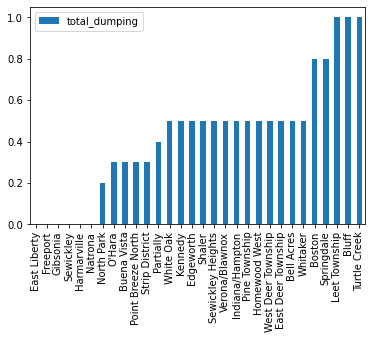

In [40]:
lowest_garbage=dumpPerHood.sort_values(by=['total_dumping'], ascending=True).head(30)
lowest_garbage.plot.bar()

Based off the results of my data set, I found that there were multiple neighborhoods that had no illegal dumping. These included East Liberty, Freeport, Gibsonia, Sewickley, Harmarville, and Natrona. Any of these neighborhoods would be the best option if only considering the amount of illegal dumping. The average per neighborhood was slightly more than 16 tons, so any of these neighborhoods under 5 tons are also a very good options, being well ahead of the curve. Illegal dumping is a very important factor when selecting a neighborhood to live in because illegal dumping can have negative health effects. A large amount of dumping indicates a messy and unhealthy neighborhood. Additionally it reflects that a neighborhood is less likely to enforce health standards in general. Finding a place that is both clean and healthy to live in is very important, and thats why it is very important to consider illegal dumping and it's greater consequences and implications.